In [68]:
# Carregando os dados
import pandas as pd

# Carregando dados a serem submetidos
df_test = pd.read_csv('test.csv', index_col="Id")

# Carregando dados de treinamento
df_train = pd.read_csv('train.csv', index_col="Id")

train_ID = df_train.index.values
test_ID = df_test.index.values

# Descrevendo a variavel dependente
print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


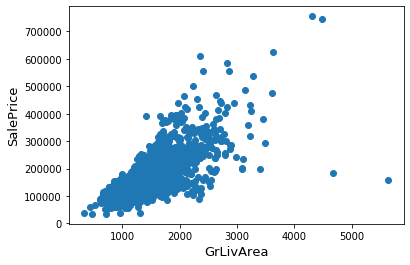

In [69]:
# Analisando outliers
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [70]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

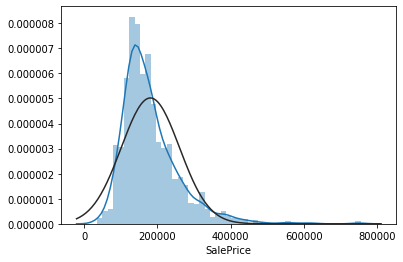

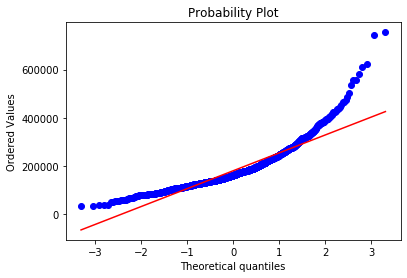

In [71]:
# Avaliando variável dependente
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import math

# Histograma e distribuição normal
def plot_dist(var):
    sns.distplot(var, fit=norm)
    fig = plt.figure()
    res = stats.probplot(var, plot=plt)
    
plot_dist(df_train['SalePrice'])
df_train['SalePrice'] = df_train['SalePrice'].apply(math.log)

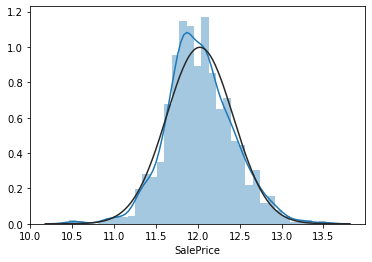

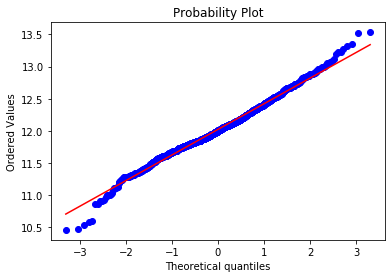

In [72]:
plot_dist(df_train['SalePrice'])

In [73]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [74]:
# Missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(30)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


In [75]:
# Casas com piscina
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [76]:
# Outros recursos
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [77]:
# Não é beco
all_data["Alley"] = all_data["Alley"].fillna("None")

In [78]:
# Sem vedação (?)
all_data["Fence"] = all_data["Fence"].fillna("None")

In [79]:
# Sem lareira
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [80]:
# Area da rua preenchida pela mediana do bairro
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [81]:
# Quando não ha garagem
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [82]:
# Quando não ha porao
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [83]:
# Paredes de alvenaria
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [84]:
# Classificacao de zoneamento (preenchendo com o valor mais comum)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [85]:
# Removendo recurso com somene um dado diferente
all_data = all_data.drop(['Utilities'], axis=1)

In [86]:
# Sefundo documentacao na significa typ para essa variavel
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [87]:
# Preenchendo com valor mais comum
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [88]:
# Classe de construcao
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [89]:
# Verificando se ainda existem dados nulos
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [90]:
# Transformando variaveis categoricas
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [91]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [92]:
# Adicionando area total da casa
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [93]:
from scipy.stats import norm, skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [94]:
# Aplicando transformação de BOX-COX (transformação mais forte para normalização (knew > .75)) 
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [95]:
# Obtendo dummies das variáveis
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [96]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [97]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [98]:
import numpy as np
n_folds = 5

def rmsle_cv(model, train, y_train):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [32]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [33]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [34]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [35]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [36]:
score = rmsle_cv(lasso, train, y_train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [37]:
score = rmsle_cv(ENet, train, y_train)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ENet score: 0.1116 (0.0074)



In [38]:
score = rmsle_cv(KRR, train, y_train)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KRR score: 0.1153 (0.0075)



In [39]:
score = rmsle_cv(GBoost, train, y_train)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBoost score: 0.1176 (0.0081)



In [45]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [46]:
score = rmsle_cv(model_xgb, train, y_train)
print("\nXGboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGboost score: 0.1152 (0.0072)



In [40]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [49]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso, model_xgb))

score = rmsle_cv(averaged_models, train, y_train)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1084 (0.0073)



In [50]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [99]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models, train, y_train)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1085 (0.0074)


In [53]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [55]:
stacked_averaged_models.fit(train, y_train)

ValueError: feature_names mismatch: ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'MiscFeature_Gar2', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219']
expected LotArea, LandContour_Bnk, SaleCondition_Partial, BldgType_Twnhs, MSZoning_RL, Foundation_Stone, CentralAir, Foundation_PConc, Exterior2nd_Brk Cmn, GarageQual, BsmtCond, BldgType_Duplex, MiscFeature_Shed, Condition1_RRNn, PavedDrive, Condition1_Norm, GarageType_BuiltIn, Neighborhood_Sawyer, Neighborhood_Somerst, LandContour_Low, BldgType_1Fam, BsmtQual, Neighborhood_NridgHt, BldgType_TwnhsE, LotConfig_Inside, Condition1_Feedr, 1stFlrSF, Condition1_RRAn, RoofMatl_Tar&Grv, Exterior2nd_Stone, SaleType_COD, FireplaceQu, HouseStyle_2Story, RoofMatl_CompShg, Exterior1st_BrkFace, RoofMatl_Membran, Condition2_Norm, MoSold, Exterior1st_ImStucc, HouseStyle_SFoyer, Heating_GasA, LotConfig_FR2, ExterQual, SaleType_ConLD, Exterior1st_VinylSd, 3SsnPorch, YearBuilt, Exterior1st_Stone, SaleType_ConLI, Exterior1st_MetalSd, RoofMatl_WdShngl, Exterior1st_CBlock, Exterior2nd_BrkFace, MiscFeature_TenC, BedroomAbvGr, RoofStyle_Flat, BsmtExposure, HalfBath, BldgType_2fmCon, MiscFeature_Gar2, LotConfig_FR3, KitchenAbvGr, GarageYrBlt, Neighborhood_SawyerW, OverallCond, GarageCars, Neighborhood_StoneBr, Condition2_RRAe, Neighborhood_MeadowV, PoolArea, Exterior2nd_Stucco, Neighborhood_NPkVill, Condition2_Artery, MasVnrType_Stone, GarageType_2Types, MSSubClass, MiscFeature_None, Exterior2nd_Plywood, RoofStyle_Hip, GarageType_Detchd, MasVnrArea, Electrical_FuseP, Heating_GasW, MSZoning_FV, Exterior2nd_AsbShng, Exterior2nd_Wd Sdng, Neighborhood_Blmngtn, HouseStyle_1.5Unf, Neighborhood_SWISU, RoofStyle_Gambrel, Condition2_RRAn, Exterior2nd_CmentBd, MiscVal, TotRmsAbvGrd, BsmtFullBath, Electrical_FuseA, Heating_Wall, HouseStyle_1.5Fin, Electrical_Mix, OpenPorchSF, MasVnrType_BrkFace, HeatingQC, LotConfig_CulDSac, RoofStyle_Mansard, RoofStyle_Shed, HouseStyle_2.5Fin, Neighborhood_Timber, ExterCond, GarageArea, Neighborhood_Edwards, SaleType_New, HouseStyle_1Story, Neighborhood_Blueste, Neighborhood_Veenker, Exterior1st_AsphShn, SaleCondition_AdjLand, Foundation_Wood, MasVnrType_BrkCmn, Exterior2nd_ImStucc, Condition2_PosN, LandSlope, Exterior1st_CemntBd, Foundation_CBlock, GarageType_CarPort, RoofMatl_Metal, Condition2_RRNn, Condition1_PosN, LotFrontage, MasVnrType_None, Exterior1st_AsbShng, KitchenQual, BsmtFinType2, Neighborhood_BrkSide, LandContour_Lvl, SaleCondition_Alloca, MSZoning_RH, Exterior2nd_MetalSd, Neighborhood_ClearCr, Exterior1st_Wd Sdng, HouseStyle_SLvl, HouseStyle_2.5Unf, SaleCondition_Normal, Functional, RoofMatl_WdShake, GarageCond, EnclosedPorch, Condition2_Feedr, 2ndFlrSF, LotShape, Condition1_RRAe, Neighborhood_IDOTRR, SaleType_WD, Neighborhood_OldTown, LandContour_HLS, MSZoning_RM, GrLivArea, Foundation_Slab, LotConfig_Corner, BsmtHalfBath, Electrical_SBrkr, SaleType_Con, PoolQC, Neighborhood_Gilbert, Heating_Floor, MSZoning_C (all), Exterior2nd_CBlock, Heating_Grav, WoodDeckSF, SaleType_Oth, Exterior1st_BrkComm, Exterior2nd_Wd Shng, Fireplaces, BsmtFinSF1, BsmtFinSF2, GarageType_Attchd, Street, LowQualFinSF, TotalBsmtSF, GarageType_Basment, Neighborhood_BrDale, BsmtUnfSF, Exterior2nd_Other, FullBath, BsmtFinType1, Foundation_BrkTil, Alley, Exterior2nd_VinylSd, OverallQual, MiscFeature_Othr, TotalSF, ScreenPorch, Heating_OthW, SaleType_CWD, Exterior2nd_AsphShn, RoofMatl_Roll, YrSold, Exterior1st_WdShing, Exterior1st_Stucco, SaleCondition_Abnorml, SaleType_ConLw, Exterior1st_Plywood, Fence, YearRemodAdd, Neighborhood_NAmes, Condition1_RRNe, Neighborhood_Mitchel, Neighborhood_Crawfor, GarageFinish, Exterior2nd_HdBoard, Electrical_FuseF, SaleCondition_Family, GarageType_None, Neighborhood_NWAmes, Neighborhood_NoRidge, Condition1_Artery, Exterior1st_HdBoard, Neighborhood_CollgCr, Condition2_PosA, Condition1_PosA, RoofStyle_Gable in input data
training data did not have the following fields: f42, f69, f86, f6, f14, f211, f125, f118, f81, f181, f35, f192, f82, f111, f88, f210, f130, f217, f107, f15, f135, f29, f7, f152, f25, f58, f66, f43, f30, f63, f201, f110, f77, f137, f139, f55, f132, f104, f83, f194, f90, f174, f19, f166, f145, f72, f161, f219, f141, f68, f116, f36, f178, f121, f0, f106, f122, f123, f44, f215, f196, f200, f168, f28, f2, f59, f129, f31, f136, f148, f99, f51, f172, f176, f34, f207, f9, f3, f70, f185, f187, f79, f105, f74, f94, f39, f100, f75, f119, f154, f198, f49, f209, f184, f52, f175, f183, f71, f80, f216, f62, f206, f64, f65, f73, f78, f4, f112, f46, f126, f60, f128, f142, f22, f85, f204, f190, f76, f50, f162, f45, f27, f95, f96, f91, f113, f156, f89, f108, f97, f41, f38, f157, f218, f205, f56, f10, f87, f12, f93, f159, f191, f188, f177, f134, f13, f103, f133, f163, f169, f98, f189, f151, f138, f23, f20, f84, f186, f173, f149, f208, f164, f170, f212, f114, f203, f48, f214, f171, f32, f102, f40, f202, f131, f158, f17, f179, f115, f193, f18, f117, f197, f127, f37, f101, f33, f167, f24, f92, f150, f195, f57, f26, f53, f11, f67, f140, f47, f143, f109, f147, f182, f54, f120, f5, f153, f8, f144, f146, f124, f1, f160, f199, f16, f155, f180, f165, f213, f21, f61

In [56]:
stacked_train_pred = stacked_averaged_models.predict(train)
stacked_pred = np.exp(stacked_averaged_models.predict(test))
print(rmsle(y_train, stacked_train_pred))

0.07869930233419746


In [57]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07894627125065065


In [58]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.80 +
               xgb_train_pred*0.20 ))

RMSLE score on train data:
0.07749313521239631


In [59]:
ensemble = stacked_pred*0.80 + xgb_pred*0.20

In [67]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)